In [2]:
import pandas as pd
import plotly.tools as tls
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.exceptions import ConvergenceWarning
#import chart_studio.plotly as py

In [3]:
df = pd.read_csv('consumer_Complaints.csv')
df.shape

(555957, 18)

In [4]:
df.head(2)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080


In [5]:
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [6]:
df['product'].unique()

array(['Mortgage', 'Credit reporting', 'Student loan', 'Debt collection',
       'Credit card', 'Bank account or service', 'Consumer Loan',
       'Money transfers', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)

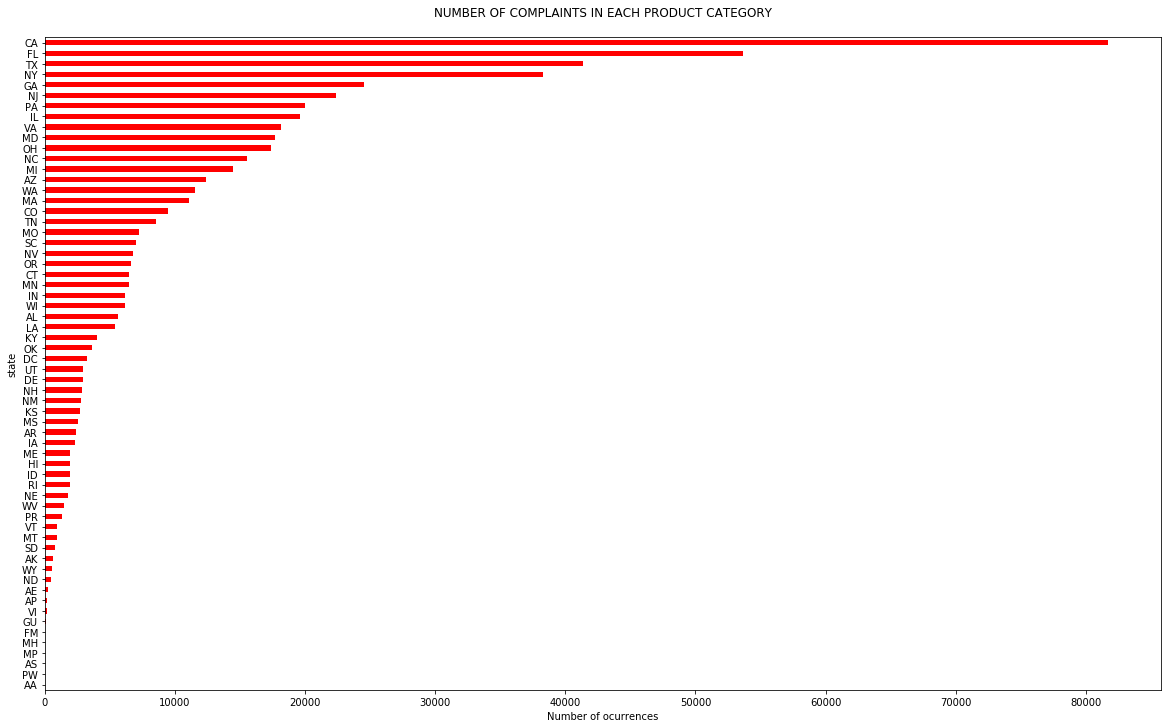

In [7]:
fig = plt.figure(figsize=(20,12))
df.groupby(['state'])['complaint_id'].count().sort_values().plot.barh(
    ylim=0, color='red', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);


In [8]:
df[df['state'] == 'CA']['product'].value_counts()

Mortgage                   32988
Debt collection            13568
Credit reporting           11965
Credit card                 9078
Bank account or service     8519
Consumer Loan               2432
Student loan                1696
Money transfers              529
Payday loan                  513
Prepaid card                 340
Other financial service       72
Name: product, dtype: int64

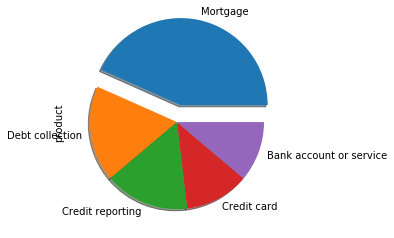

In [9]:
df[df['state'] == 'CA']['product'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [10]:
p_product_discussions = round(df["product"].value_counts() / len(df["product"]) * 300,4)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=1)))

layout = go.Layout(title='product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Mortgage                   100.6238
Debt collection             54.5287
Credit reporting            49.5653
Credit card                 35.8668
Bank account or service     33.7596
Consumer Loan               11.3264
Student loan                 8.5469
Payday loan                  2.0921
Money transfers              2.0570
Prepaid card                 1.3328
Other financial service      0.3006
Name: product, dtype: float64


In [11]:
# Building the variables for our graphs
disputed = df['consumer_disputed?'].value_counts()
company_response = df['company_response_to_consumer'].value_counts()
top5_disputed = df['company'].loc[df['consumer_disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['company'].loc[df['consumer_disputed?'] == 'No'].value_counts()[:5]


In [12]:
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000'])
    )

top5_disputes_plotly = go.Bar(
            x=top5_disputed.index.values,
            y=top5_disputed.values,
    text='Disputes',
    showlegend=False,
    marker=dict(
        color=top5_disputed.values,
        colorscale='Reds')
    )

top5_nodisputes_plotly = go.Bar(
            x=top5_nodispute.index.values,
            y=top5_nodispute.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=top5_nodispute.values,
        colorscale='Blues')
    )
# Lower Subplot
customer_res_plotly = go.Bar(
            x=company_response.index.values,
            y=company_response.values,
    text='Customer Response',
    showlegend=False,
        marker=dict(
        color=df['company_response_to_consumer'].value_counts().values,
        colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], 
                      [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], 
                      [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], 
                      [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], 
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True
        )
)

fig = tls.make_subplots(rows=2, cols=3, specs=[[{}, {}, {}], [{'colspan': 3}, None, None]],
                          subplot_titles=('Did the Customer Disputed?',
                                          'Disputes',
                                         'No Disputes',
                                         'company_response_to_consumer'))

# First three Subplots
fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly , 1, 2)
fig.append_trace(top5_nodisputes_plotly , 1, 3)

# Lower Subplot
fig.append_trace(customer_res_plotly, 2, 1)



fig['layout'].update(showlegend=True, height=600, width=800, title='Sectors')
iplot(fig, filename='Complaints')


In [13]:
df['date_received'] = pd.to_datetime(df['date_received'])
df['year_received'], df['month_received'] = df['date_received'].dt.year, df['date_received'].dt.month
df.head()


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,year_received,month_received
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,2013,8
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,2013,8
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,2013,8
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,2013,8
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,2013,8


In [14]:
 #Create a Line Plot by the top 5 companies  by year who had more customer interaction cases (Disputes and No Disputes)
sorting_groups = df.groupby(['year_received', 'consumer_disputed?'])['company'].apply(lambda x: x.value_counts())
d = {'CRM': sorting_groups}


year_crm = pd.DataFrame(data=d).reset_index()
year_crm.sort_values(by='CRM', ascending=False)

crm_df = year_crm.rename(columns={"level_2": "company"})

# Conditionals Top 5 Companies with dispues (Bank of America, Wells Fargo, JP Morgan, Equifax, CitiBank)
boa_disputes = crm_df.loc[(crm_df['company'] == 'Bank of America') & (crm_df['consumer_disputed?'] == 'Yes')]
wfc_disputes = crm_df.loc[(crm_df['company'] == 'Wells Fargo & Company') & (crm_df['consumer_disputed?'] == 'Yes')]
jp_disputes = crm_df.loc[(crm_df['company'] == 'JPMorgan Chase & Co.') & (crm_df['consumer_disputed?'] == 'Yes')]
equi_disputes = crm_df.loc[(crm_df['company'] == 'Equifax') & (crm_df['consumer_disputed?'] == 'Yes')]
citi_disputes = crm_df.loc[(crm_df['company'] == 'Citibank') & (crm_df['consumer_disputed?'] == 'Yes')]

# Establish the year (Continue Here tomorrow!)
years = boa_disputes['year_received'].values.tolist()

In [15]:
crm_df.head()

,year_received,consumer_disputed?,company,CRM
0,2011,No,Bank of America,432
1,2011,No,JPMorgan Chase & Co.,298
2,2011,No,Citibank,255
3,2011,No,Capital One,201
4,2011,No,Wells Fargo & Company,170


In [16]:
# Implementing line chart (top 5 companies with complaints)
boa_disputes_amount = boa_disputes['CRM'].values.tolist()
wfc_disputes_amount = wfc_disputes['CRM'].values.tolist()
jp_disputes_amount = jp_disputes['CRM'].values.tolist()
equi_disputes_amount = equi_disputes['CRM'].values.tolist()
citi_disputes_amount = citi_disputes['CRM'].values.tolist()

# Text to add
boa_text = [str(dis) + '\n Disputes'  for dis in boa_disputes_amount]
wfc_text = [str(wfc) + '\n Disputes'  for wfc in wfc_disputes_amount]
jp_text = [str(jp) + '\n Disputes' for jp in jp_disputes_amount]
equi_text = [str(equi) + '\n Disputes' for equi in equi_disputes_amount]
citi_text = [str(citi) + '\n Disputes' for citi in citi_disputes_amount]

boa_disputes_chart = go.Scatter(
    x=years,
    y=boa_disputes_amount,
    text=boa_text,
    name='Bank of America', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 22, 235)',
             ),
    fill='tonexty'
)

wfc_disputes_chart = go.Scatter(
    x=years,
    y=wfc_disputes_amount,
    text=wfc_text,
    name="Wells Fargo & Company", 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(275, 170, 0)',
             ),
    fill='tonexty'
)

jp_disputes_chart = go.Scatter(
    x=years,
    y=jp_disputes_amount,
    text=jp_text,
    name='JP Morgan Chase & Co.',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(128, 128, 128)',
             ),
    fill='tonexty'
)

equi_disputes_chart = go.Scatter(
    x=years,
    y=equi_disputes_amount,
    text=equi_text,
    name='Equifax',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(175, 0, 0)',
             ),
    fill='tonexty'
)

citi_disputes_chart = go.Scatter(
    x=years,
    y=citi_disputes_amount,
    text=citi_text,
    name='CitiBank',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 215, 215)',
             ),
    fill='tonexty'
)

data = [boa_disputes_chart, wfc_disputes_chart, jp_disputes_chart, equi_disputes_chart, citi_disputes_chart]

layout = dict(title = 'Number of Disputes <br> (Top 5 Companies)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Disputes')
             )


fig = dict(data=data, layout=layout)


iplot(fig, filename='basic-area-no-bound')


In [17]:
# Months with the highest disputes (We will make a barplot)
def customerservice_per_month(month, dispute):
    result = df.loc[(df['month_received'] == month) & (df['consumer_disputed?'] == dispute)]
    return result

# Monthly Disputes
dis_january = len(customerservice_per_month(month=1, dispute='Yes'))
dis_february = len(customerservice_per_month(month=2, dispute='Yes'))
dis_march = len(customerservice_per_month(month=3, dispute='Yes'))
dis_april = len(customerservice_per_month(month=4, dispute='Yes'))
dis_may = len(customerservice_per_month(month=5, dispute='Yes'))
dis_june = len(customerservice_per_month(month=6, dispute='Yes'))
dis_july = len(customerservice_per_month(month=7, dispute='Yes'))
dis_august = len(customerservice_per_month(month=8, dispute='Yes'))
dis_september = len(customerservice_per_month(month=9, dispute='Yes'))
dis_october = len(customerservice_per_month(month=10, dispute='Yes'))
dis_november = len(customerservice_per_month(month=11, dispute='Yes'))
dis_december = len(customerservice_per_month(month=12, dispute='Yes'))

# Monthly No-Disputes
nodis_january = len(customerservice_per_month(month=1, dispute='No'))
nodis_february = len(customerservice_per_month(month=2, dispute='No'))
nodis_march = len(customerservice_per_month(month=3, dispute='No'))
nodis_april = len(customerservice_per_month(month=4, dispute='No'))
nodis_may = len(customerservice_per_month(month=5, dispute='No'))
nodis_june = len(customerservice_per_month(month=6, dispute='No'))
nodis_july = len(customerservice_per_month(month=7, dispute='No'))
nodis_august = len(customerservice_per_month(month=8, dispute='No'))
nodis_september = len(customerservice_per_month(month=9, dispute='No'))
nodis_october = len(customerservice_per_month(month=10, dispute='No'))
nodis_november = len(customerservice_per_month(month=11, dispute='No'))
nodis_december = len(customerservice_per_month(month=12, dispute='No'))


In [18]:
# Most active months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
disputes_by_month = [dis_january, dis_february, dis_march, dis_april, dis_may, dis_june, dis_july, dis_august, dis_september,
                    dis_october, dis_november, dis_december]

nodisputes_by_month = [nodis_january, nodis_february, nodis_march, nodis_april, nodis_may, nodis_june, nodis_july, 
                       nodis_august, nodis_september, nodis_october, nodis_november, nodis_december]


disputes_chart = go.Bar(
    y=months,
    x=disputes_by_month,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3232',
        width=1.5
    ))
)

nodisputes_chart = go.Bar(
    y=months,
    x=nodisputes_by_month,
    orientation='h',
    name='No Disputes',
    text='No Disputes',
    marker=dict(
        color='#A9FFA9',
    line=dict(
        color='#59AF59',
        width=1.5
    ))
)

fig = tls.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Dispute Chart per Month',
                                          'No Dispute Chart per Month'))

fig.append_trace(disputes_chart, 1, 1)
fig.append_trace(nodisputes_chart, 1, 2)

fig['layout'].update(showlegend=True, title="Level of Activity by Month")
iplot(fig)


In [19]:
df.groupby(['company'])['consumer_disputed?'].count().sort_values(ascending=False).head(5)

company
Bank of America          55998
Wells Fargo & Company    42024
JPMorgan Chase & Co.     33881
Equifax                  31828
Experian                 30905
Name: consumer_disputed?, dtype: int64

In [20]:
dispute_presence = df.loc[df['consumer_disputed?'] == 'Yes']
cross_month = pd.crosstab(dispute_presence['state'], dispute_presence['company']).apply(lambda x: x/x.sum() * 100)

In [21]:
#  Share of Most disputes for Bank of America.
df_boa = pd.DataFrame(cross_month['Bank of America']).reset_index().sort_values(by="Bank of America", ascending=False).round(2)
df_boa = df_boa.rename(columns={'Bank of America': 'share of complaints'})

for col in df_boa.columns:
    df_boa[col] = df_boa[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]


df_boa['text'] = "state Code: " + df_boa['state'] + '<br>'

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_boa['state'],
        z = df_boa['share of complaints'], 
        locationmode = 'USA-states',
        text = df_boa['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
    title = 'Most Complaints by State <br> Bank of America',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

In [22]:
df[df['company'] == 'Bank of America']['product'].value_counts()


Mortgage                   36228
Bank account or service    10440
Credit card                 7224
Debt collection             1173
Consumer Loan                541
Money transfers              200
Student loan                  70
Other financial service       44
Credit reporting              37
Prepaid card                  33
Payday loan                    8
Name: product, dtype: int64

In [23]:
len(df[df['timely_response'] == 'Yes'])/len(df['timely_response'])

0.9747318587588608

In [24]:
df[(df['timely_response'] == 'Yes') & (df['consumer_disputed?'] == 'Yes')]['company'].value_counts().head(10)

Bank of America                           12198
Wells Fargo & Company                      9569
JPMorgan Chase & Co.                       7700
Equifax                                    6647
Citibank                                   5225
Ocwen                                      4971
Experian                                   3891
TransUnion Intermediate Holdings, Inc.     3824
Nationstar Mortgage                        3133
Capital One                                2923
Name: company, dtype: int64

In [25]:
len(df[(df['timely_response'] == 'Yes') & (df['consumer_disputed?'] == 'Yes')])/len(df[df['consumer_disputed?'] == 'Yes'])

0.98472363422334

In [26]:
df[(df['timely_response'] == 'No') & (df['consumer_disputed?'] == 'Yes')]['company'].value_counts().head(10)

Bank of America                   282
Ocwen                              96
Wells Fargo & Company              75
Residential Credit Solutions       30
CIT Bank National Association      29
Nationstar Mortgage                24
Citibank                           20
National Credit Systems,Inc.       18
U.S. Bancorp                       18
Southwest Credit Systems, L.P.     17
Name: company, dtype: int64

In [27]:
len(df[(df['timely_response'] == 'No') & (df['consumer_disputed?'] == 'Yes')])/len(df[df['consumer_disputed?'] == 'Yes'])

0.015276365776660068

Text(0.5, 0, 'No of Complaints')

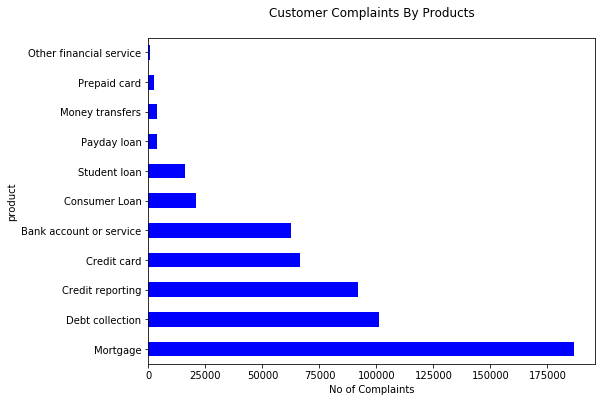

In [28]:
Complaints_by_products = df.groupby(['product'])['complaint_id'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(8,6))
Complaints_by_products.plot.barh(ylim=0,color='blue',title= 'Customer Complaints By Products\n')
plt.xlabel('No of Complaints')

In [29]:
df[df['product'] == 'Mortgage']['issue'].value_counts()

Loan modification,collection,foreclosure    97191
Loan servicing, payments, escrow account    60375
Application, originator, mortgage broker    13306
Settlement process and costs                 6888
Credit decision / Underwriting               4418
Other                                        4297
Name: issue, dtype: int64

Text(0.5, 0, '')

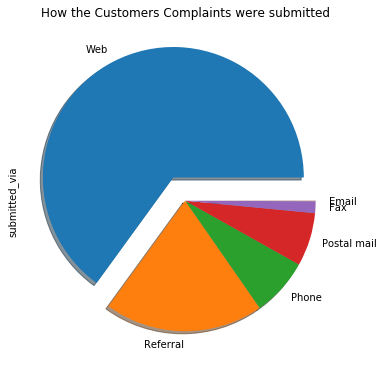

In [30]:
submitted_via_df = df['submitted_via'].value_counts()
fig = plt.figure(figsize=(8,6))
submitted_via_df.plot.pie(title= 'How the Customers Complaints were submitted\n',explode=[0.2,0,0,0,0,0],shadow=True)
plt.xlabel('')

Text(0.5, 0, 'No of Complaints')

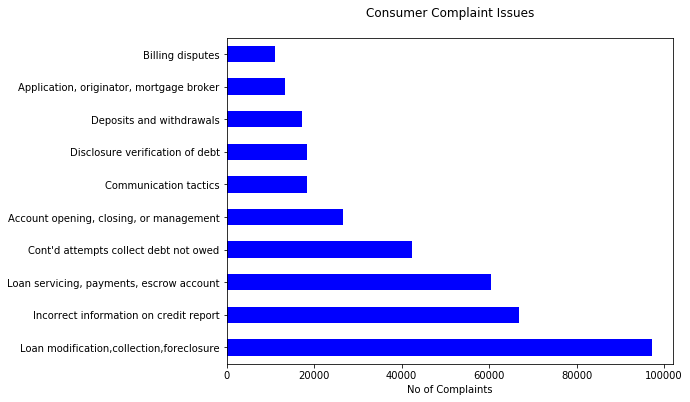

In [31]:
Issue_df = df['issue'].value_counts().head(10)
fig = plt.figure(figsize=(8,6))
Issue_df.plot.barh(ylim=0, color='blue', title= 'Consumer Complaint Issues\n')
plt.xlabel('No of Complaints')

In [32]:
# Create a new dataframe with two columns
df1 = df[['product', 'consumer_complaint_narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['consumer_complaint_narrative'])]

# Renaming second column for a simpler name
df1.columns = ['product', 'consumer_complaint'] 

df1.shape

(66806, 2)

In [33]:
# Percentage of complaints with text
total = df1['consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

12.0

In [34]:
pd.DataFrame(df['product'].unique()).values

array([['Mortgage'],
       ['Credit reporting'],
       ['Student loan'],
       ['Debt collection'],
       ['Credit card'],
       ['Bank account or service'],
       ['Consumer Loan'],
       ['Money transfers'],
       ['Payday loan'],
       ['Prepaid card'],
       ['Other financial service']], dtype=object)

In [35]:
# Renaming categories
df1.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)


In [36]:
pd.DataFrame(df1['product'].unique())

,0
0,Debt collection
1,Consumer Loan
2,Mortgage
3,Credit card
4,Credit reporting
5,Student loan
6,Bank account or service
7,Payday loan
8,Money transfers
9,Other financial service


In [37]:
 #Create a new column 'category_id' with encoded categories 
df1['category_id'] = df1['product'].factorize()[0]
category_id_df = df1[['product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)

# New dataframe
df1.head()

,product,consumer_complaint,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


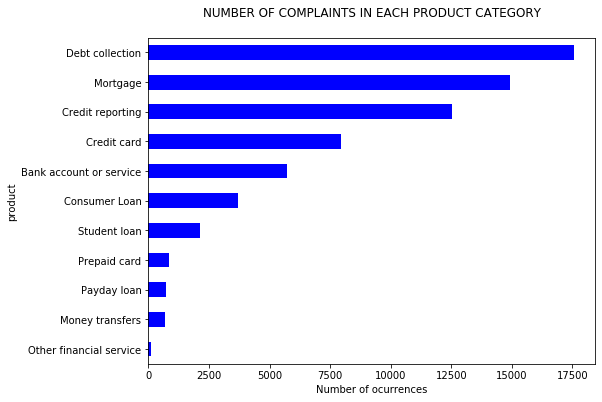

In [38]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df1.groupby('product').consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color='Blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [39]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df1.consumer_complaint).toarray()

labels = df1.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 66806 complaints is represented by 159200 features (TF-IDF score of unigrams and bigrams)


In [148]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(Product))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: bank, branch, overdraft
  * Most Correlated Bigrams are: overdraft fee, checking account, overdraft fees

==> Consumer Loan:
  * Most Correlated Unigrams are: ally, car, vehicle
  * Most Correlated Bigrams are: car loan, vehicle xxxx, auto loan

==> Credit card:
  * Most Correlated Unigrams are: capital, macy, card
  * Most Correlated Bigrams are: annual fee, american express, credit card

==> Credit reporting:
  * Most Correlated Unigrams are: transunion, experian, equifax
  * Most Correlated Bigrams are: report xxxx, trans union, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt collection, collect debt, collection agency

==> Money transfers:
  * Most Correlated Unigrams are: gram, moneygram, western
  * Most Correlated Bigrams are: money gram, money transfer, western union

==> Mortgage:
  * Most Correlated Unigrams are: foreclosure, mo

In [40]:
X = df1['consumer_complaint'] # Collection of documents
y = df1['product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)